In [ ]:
__author__ = "Miguel R. Ferreira Filho"
__email__ = "miguel.ribeiro@live.com"
__website__ = "miguelrferreiraf.github.io"

# Students performance with Decision Tree

## Machine Learning basic concepts

![alt text](https://eitrawmaterials.eu/wp-content/uploads/2019/05/Label-brochure-1.jpg)

Hello, folks.

In this project I'm gonna show that not all machine learning is neural network.

We can obtain great results with less sophisticated models, that we learn as we begin to study machine learning.

Here, you are going to be introduced to Decision Trees, a very simple model  

Since this is somethig we learn when beggining studying machine learning, this project will retroced to some basic principles about the work of a machine learning enngineer, as "what is a model?" and "how does it LEARN how to solve the problem?"

I'm not a great fan of cake recipes or step-by-step procedures. I appreciate it in studying process in order to ease the learning and when beginning to learn some new skill but not to be oebyed dogmatically.

But especifically here,I am going to show a basic process of machine learning building through the traditional process of machine learing projects, that are world widely accepted by machine learning experts and data analysts.

I don't belive rules are made to be broken. I believe rules must be masterized to be breakable. Let's see the traditional procedure:

1. Get the data.
2. Cleaning and analysing the data.
3. Establishing which model is the most convenient for the current problem and creating it.
4.  Presenting solution based on conclusions.

There may be variations on this step-by-step. Some os them may have more steps.

Generally, in a corporative project there are experts for each steps of this schema. Analyists cleans and get insights from the data. Data Scientists get what model to use. Machine Learning engineers build the model.

 

# Getting the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I've got this data from a pre-existing file. 

Obtaing the data through web scrapping methods is not hard. If you have some past with HTML, CSS or Javasript, is quite easy to getting into any site and use Python to isolate tags, divs and lists with the wanted information using basic Python. We are noot gonna do this now. 

In [ ]:
import pandas as pd

d = pd.read_csv('/content/drive/MyDrive/Códigos/Data_Scienc_Projects_(from-books)/student_grade(CÓDIGO_FINALIZADO)/data images/student-por.csv', sep=';')
d


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
len(d)

649

# Cleaning

I'm going to show a small skill in feature engineering by adding an extra column in this dataset. 

Since this Linear Regression model will predict if a student will or not be approved, we would need a label to predict based in the features given. This label is "passed" or "not passed". 1 or 0. Very simple. Let's add it based in some previous rules.

We are going to get the sum of the three first tests. If the sum is equal or greater than 35, the label column added will show a 1, indicating the student passed. If not, it will show a 0. 

In [ ]:
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)

d = d.drop(['G1', 'G2', 'G3'], axis=1)

d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


## Changing text for numbers

Some columns, you may have noticed, have phrases and words and not numbers. 

Although I have in this same portfolio a machine learning project to teach an neural network to read, I'm not gonna introduce Lil Ivanhoe to you now XD. 

Let's turn this columns into numeric values. For this, we are going to use a trick called one-hot enconding, that consists in turn the random text value in the column into a number and retrieve this number anytime that same text pattern appears in the column. Very simple. 

We are going to use tis code line `pd.get_dummies` and indicate the columns we want to apply the one-hot encoding. 

In [ ]:
d = pd.get_dummies(d, columns=['sex','school','address','famsize','Pstatus','Mjob','Fjob','reason',
                               'guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])

d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


# Shuffling and splitting dataset. 

Here, we are going to shuffle the rows. Then we are going to create and train the dataset made of 549 rows and use the others 100 as test.

Then, we must get rid of the pass column for it's our label. We are going to put it in a different dataset. That's gonna be needed for our model application to know what he need to analyse in order to predict and what need to be predicted (if the students passed or not).

Only for the sake of curiosity, let's also see how many oof the students passed and the percentage.


In [ ]:
# shuffle rows
d = d.sample(frac=1)
# split training and testing data
d_train = d[:549]
d_test = d[549:]

# Adding pass column to a different dataset
d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

# number of passing students in whole dataset:
import numpy as np
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 328 out of 649 (50.54%)


# The model 

A decision tree is a model based on graph theory that work with a if-then-else system. In fact, it is even possible to write a decision tree using only `if` and `else`.

A tree consists in of nodes with with conditions. If the condition is satisfied, node progesses to one side of the tree. Otherwise, it goes to the other side.

Imagine for exmaple a decision tree to predict if a man will or not go outside to play football depending on weather. We can establish some variables about the weather (cloudy, precipitation, wind, temperature) and, finnaly, if this man will or not play football (play).

![alt text](https://drive.google.com/uc?id=1kBNDRatqN8VQBgQdNAKSij-qrU0mwmHw)

A decision tree is going to work like this:

![alt text](https://drive.google.com/uc?id=1lxZQH5sgtdu0m6i326-VOX3L4iU3qxyT)

Trees are used anytime we want to create a hierarchy of objects such as operating systems, graphics, database systems, and
computer networking.

Trees can be used to do both classification (defining if something belong to a certain type of thing based on it's data) or regression (defining optimals between values to find a idel value).

Trees can be increased on it's complexity. We can code this using th code line `max_depth`, like this:

`dt = DecisionTreeClassifier(max_depth=2)`


Now, we are going the use the standard fiting code line to appl the model on analisyng the datasets we created:




In [ ]:
# fit a decision tree
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(d_train_att, d_train_pass)

The `expoert-graphviz` library allow us to see the graphs (or nodes) of our tree (and then we can understand why is it called tree), as the data processed inside of each node.

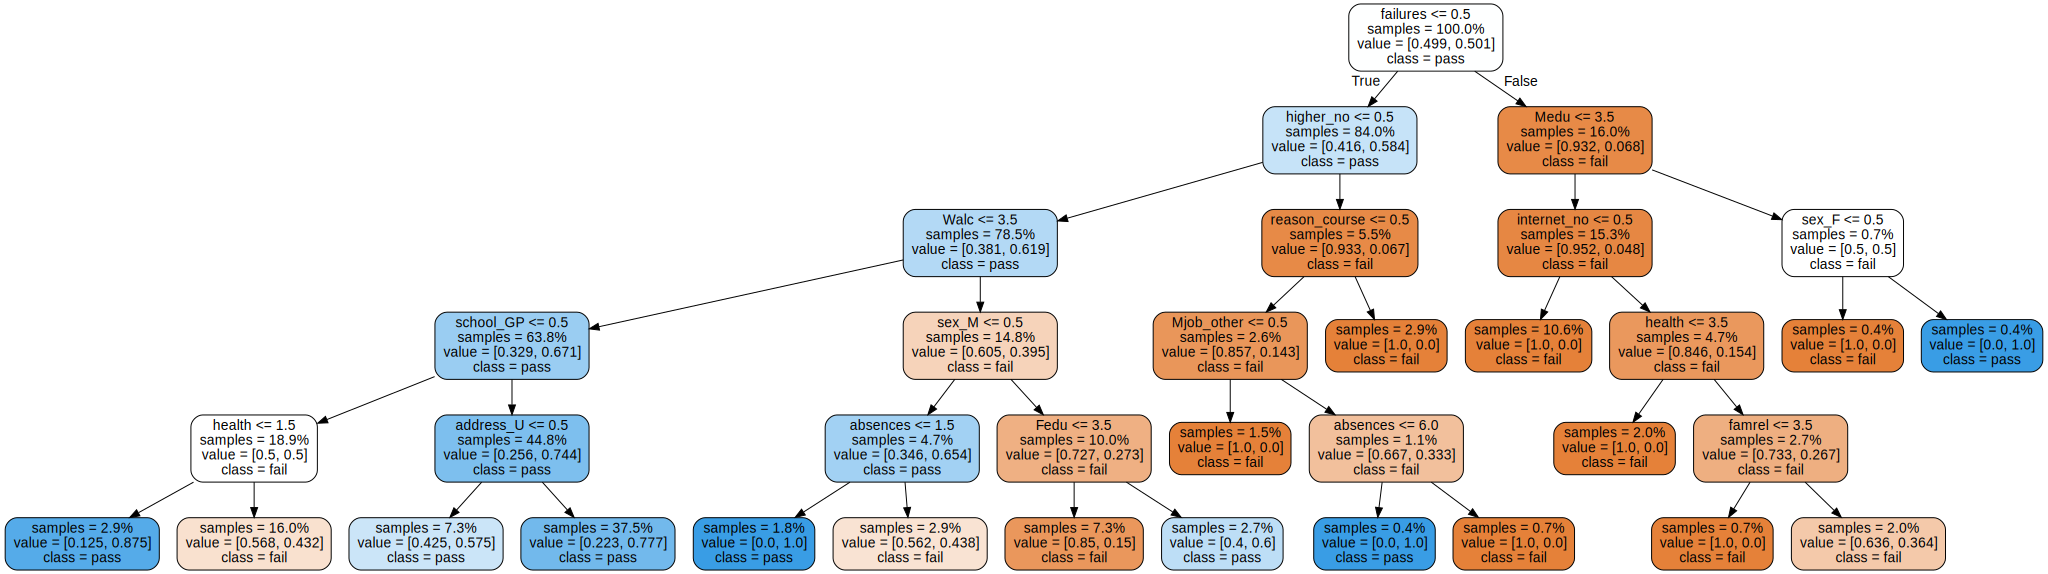

In [ ]:
import graphviz
dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True,
                                feature_names=list(d_train_att), class_names=["fail", "pass"], 
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

Now, let`s check the score of our model.

In [ ]:
t.score(d_test_att, d_test_pass)

0.64

As you can see is approximatedly 64%.

We now are going to cross the result to assure the perfect result of thhe dataset training.

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.07)


We can see that the result is perfect: 67% with a standard deviation of 7%, so we previous result of 64% is perfectly matched.  

Let's use a lasso to repeat the previous command to watch different results with differents depths (`max_depth`), 1 to 20.

In [ ]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accuracy: 0.62 (+/- 0.06)
Max depth: 2, Accuracy: 0.69 (+/- 0.07)
Max depth: 3, Accuracy: 0.68 (+/- 0.09)
Max depth: 4, Accuracy: 0.68 (+/- 0.12)
Max depth: 5, Accuracy: 0.67 (+/- 0.07)
Max depth: 6, Accuracy: 0.68 (+/- 0.09)
Max depth: 7, Accuracy: 0.67 (+/- 0.09)
Max depth: 8, Accuracy: 0.66 (+/- 0.09)
Max depth: 9, Accuracy: 0.66 (+/- 0.10)
Max depth: 10, Accuracy: 0.66 (+/- 0.10)
Max depth: 11, Accuracy: 0.65 (+/- 0.10)
Max depth: 12, Accuracy: 0.63 (+/- 0.10)
Max depth: 13, Accuracy: 0.65 (+/- 0.10)
Max depth: 14, Accuracy: 0.63 (+/- 0.08)
Max depth: 15, Accuracy: 0.63 (+/- 0.09)
Max depth: 16, Accuracy: 0.63 (+/- 0.06)
Max depth: 17, Accuracy: 0.62 (+/- 0.09)
Max depth: 18, Accuracy: 0.64 (+/- 0.10)
Max depth: 19, Accuracy: 0.63 (+/- 0.11)


Now, let's see the different results of each lasso and it's standard deviation.


In [ ]:
depth_acc = np.empty((19,3), float)
i = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1
    
depth_acc

array([[ 1.        ,  0.6194037 ,  0.06145583],
       [ 2.        ,  0.68719141,  0.06886963],
       [ 3.        ,  0.68255218,  0.09302367],
       [ 4.        ,  0.6856768 ,  0.12429794],
       [ 5.        ,  0.67338104,  0.07057408],
       [ 6.        ,  0.68263566,  0.10122481],
       [ 7.        ,  0.67338104,  0.08896973],
       [ 8.        ,  0.67036374,  0.10163557],
       [ 9.        ,  0.67028026,  0.11130993],
       [10.        ,  0.66417412,  0.10239262],
       [11.        ,  0.6456291 ,  0.08722649],
       [12.        ,  0.64877758,  0.11446648],
       [13.        ,  0.65650566,  0.1207569 ],
       [14.        ,  0.63484794,  0.06585727],
       [15.        ,  0.63796064,  0.06261708],
       [16.        ,  0.63333333,  0.08599497],
       [17.        ,  0.62409064,  0.10196151],
       [18.        ,  0.6380322 ,  0.12073204],
       [19.        ,  0.62719141,  0.10504828]])

Now, let's plot the results and the standard deviation of each one.



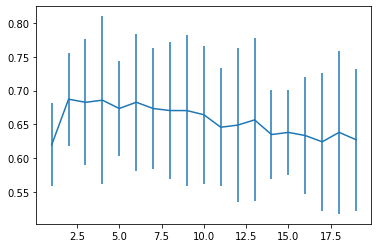

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()

# Conclusion

As we could demonstrate, the tree of decision is also very efficient to predict students pass ratio. 

Bye.

![alt text](https://giffiles.alphacoders.com/263/26315.gif)

In [1]:
! jupyter nbconvert --to html por_student_FINALIZADO.ipynb

[NbConvertApp] Converting notebook por_student_FINALIZADO.ipynb to html
[NbConvertApp] Writing 381624 bytes to por_student_FINALIZADO.html
